<a href="https://colab.research.google.com/github/14marcos1/Geral01/blob/main/elt575_semana3_atividade_2_maticula_51687_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ELT 575
MARCOS RODRIGO DE OLIVERA
MATRÍCULA 51687
SEMANA 3
ATIVIDADE 2



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Importação direta para manter compatibilidade com o notebook original
from pandas import read_csv

# Ferramentas para construir a Rede Neural (LSTM e Dropout)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Ferramentas para normalização e cálculo de erro (RMSE)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Garante que os gráficos apareçam no corpo do notebook
%matplotlib inline

In [3]:
from google.colab import files
import io

# 1. Abre a janela para você selecionar o arquivo no seu computador
uploaded = files.upload()

# 2. Carrega o arquivo selecionado para um DataFrame do Pandas
# Certifique-se de selecionar o arquivo 'tesla_stock_2015_2022 (1).csv'
df = read_csv(io.BytesIO(uploaded['tesla_stock_2015_2022 (1).csv']), usecols=['Open'], engine='python')
data = np.array(df.values.astype('float32'))

# 3. Normalização: Transforma os preços para uma escala entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data).flatten()

# 4. Divisão: 80% para treino e os últimos 20% para teste
split_percent = 0.8
n = len(data)
split = int(n * split_percent)

train_data = data[:split]
test_data = data[split:]

print(f"Arquivo carregado com sucesso!")
print(f"Registros de Treino (80%): {len(train_data)}")
print(f"Registros de Teste (20%): {len(test_data)}")

Saving tesla_stock_2015_2022 (1).csv to tesla_stock_2015_2022 (1).csv
Arquivo carregado com sucesso!
Registros de Treino (80%): 1315
Registros de Teste (20%): 329


In [4]:
# 1. Função para transformar a lista de preços em sequências de entrada (X) e alvos (Y)
def get_XY(dat, time_steps):
    # Cria os índices para os valores que queremos prever
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    # Organiza os dados anteriores em blocos de 'time_steps' (X)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

# 2. Função para calcular e exibir a Raiz do Erro Médio Quadrático (RMSE)
def print_error(trainY, testY, train_predict, test_predict):
    # Calcula o RMSE para os conjuntos de treino e teste
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    print('RMSE Treino: %.3f' % (train_rmse))
    print('RMSE Teste: %.3f' % (test_rmse))

# 3. Função para gerar o gráfico comparativo (Original vs. Previsão)
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    plt.figure(figsize=(15, 6))
    plt.plot(actual, label='Valor Real (Tesla)')
    plt.plot(predictions, label='Previsão da Rede')
    # Linha vertical separando onde termina o treino e começa o teste (os últimos 20%)
    plt.axvline(x=len(trainY), color='r', linestyle='--', label='Início do Teste (20%)')
    plt.legend()
    plt.title('Tesla Stock (Open) - Original vs Previsto')
    plt.show()

In [5]:
# Definindo o tamanho da janela (12 dias de histórico para prever o próximo ponto)
time_steps = 12

# Criando as matrizes X e Y para Treino e Teste
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

print(f"Formato dos dados de entrada (X): {trainX.shape}")
print(f"Formato dos dados de alvo (Y): {trainY.shape}")

Formato dos dados de entrada (X): (109, 12, 1)
Formato dos dados de alvo (Y): (109,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iniciando o treinamento do Modelo 1...
Epoch 1/20
109/109 - 3s - 23ms/step - loss: 4.4144e-04
Epoch 2/20
109/109 - 0s - 4ms/step - loss: 1.1269e-04
Epoch 3/20
109/109 - 0s - 4ms/step - loss: 8.0645e-05
Epoch 4/20
109/109 - 0s - 4ms/step - loss: 9.4789e-05
Epoch 5/20
109/109 - 0s - 4ms/step - loss: 7.2033e-05
Epoch 6/20
109/109 - 1s - 5ms/step - loss: 1.1229e-04
Epoch 7/20
109/109 - 0s - 4ms/step - loss: 6.1092e-05
Epoch 8/20
109/109 - 0s - 4ms/step - loss: 1.0900e-04
Epoch 9/20
109/109 - 1s - 7ms/step - loss: 6.1027e-05
Epoch 10/20
109/109 - 1s - 6ms/step - loss: 1.0896e-04
Epoch 11/20
109/109 - 1s - 7ms/step - loss: 9.6235e-05
Epoch 12/20
109/109 - 1s - 5ms/step - loss: 7.4899e-05
Epoch 13/20
109/109 - 0s - 4ms/step - loss: 1.0241e-04
Epoch 14/20
109/109 - 0s - 4ms/step - loss: 6.3931e-05
Epoch 15/20
109/109 - 0s - 4ms/step - loss: 3.8436e-05
Epoch 16/20
109/109 - 1s - 6ms/step - loss: 4.6047e-05
Epoch 17/20
109/109 - 0s - 4ms/step - loss: 5.8651e-05
Epoch 18/20
109/109 - 0s - 4ms/ste

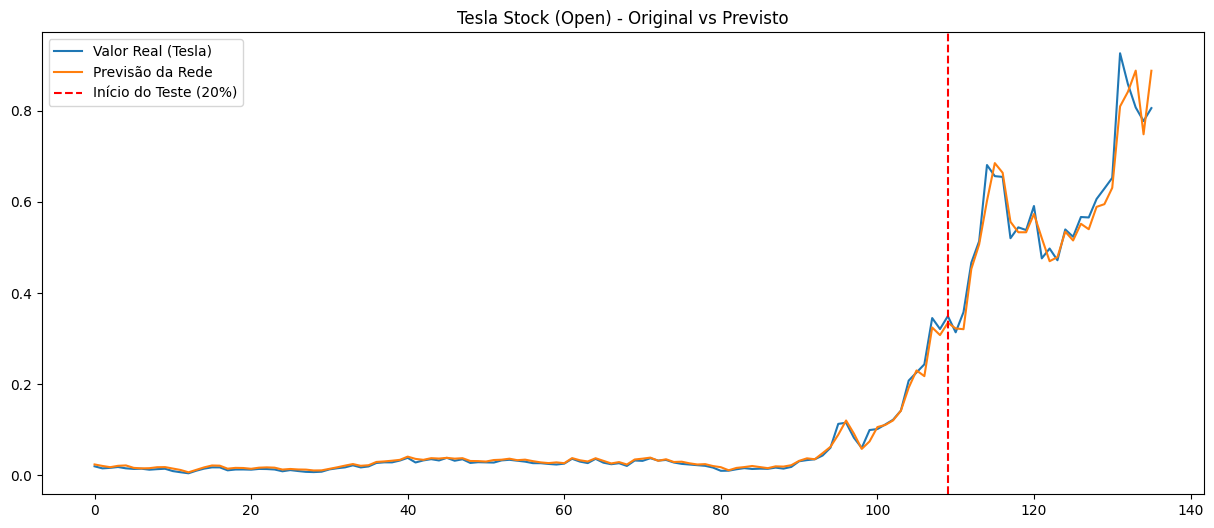

In [6]:
# 1. Definindo a arquitetura do Modelo 1
model1 = Sequential()

# Adicionando uma única camada LSTM com 50 unidades ocultas
# O input_shape diz para a rede que ela deve olhar para janelas de 12 dias (time_steps)
model1.add(LSTM(50, input_shape=(time_steps, 1), activation='tanh'))

# Camada de saída que gera um único número (o preço previsto)
model1.add(Dense(1))

# Configurando como a rede deve aprender (otimizador Adam e erro quadrático médio)
model1.compile(loss='mean_squared_error', optimizer='adam')

# 2. Treinando o modelo
# verbose=2 mostra o progresso linha a linha. epochs=20 é o número de vezes que ela verá os dados.
print("Iniciando o treinamento do Modelo 1...")
model1.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# 3. Gerando as previsões para avaliação
train_predict1 = model1.predict(trainX)
test_predict1 = model1.predict(testX)

# 4. Exibindo os Resultados (Usando as funções que definimos no Passo 3)
print("\n--- RESULTADOS DO MODELO 1 ---")
print_error(trainY, testY, train_predict1, test_predict1)
plot_result(trainY, testY, train_predict1, test_predict1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iniciando o treinamento do Modelo 2...
Epoch 1/20
109/109 - 3s - 31ms/step - loss: 3.2380e-04
Epoch 2/20
109/109 - 1s - 6ms/step - loss: 6.2644e-04
Epoch 3/20
109/109 - 1s - 12ms/step - loss: 1.8605e-04
Epoch 4/20
109/109 - 1s - 12ms/step - loss: 1.5224e-04
Epoch 5/20
109/109 - 1s - 6ms/step - loss: 8.7920e-05
Epoch 6/20
109/109 - 1s - 6ms/step - loss: 1.4686e-04
Epoch 7/20
109/109 - 1s - 6ms/step - loss: 6.9134e-05
Epoch 8/20
109/109 - 1s - 11ms/step - loss: 4.0762e-04
Epoch 9/20
109/109 - 1s - 11ms/step - loss: 1.0868e-04
Epoch 10/20
109/109 - 1s - 7ms/step - loss: 2.4747e-04
Epoch 11/20
109/109 - 1s - 7ms/step - loss: 1.1236e-04
Epoch 12/20
109/109 - 1s - 6ms/step - loss: 1.4617e-04
Epoch 13/20
109/109 - 1s - 6ms/step - loss: 1.0093e-04
Epoch 14/20
109/109 - 1s - 6ms/step - loss: 9.4205e-05
Epoch 15/20
109/109 - 1s - 6ms/step - loss: 8.2173e-05
Epoch 16/20
109/109 - 1s - 6ms/step - loss: 4.7146e-05
Epoch 17/20
109/109 - 1s - 6ms/step - loss: 6.7888e-05
Epoch 18/20
109/109 - 1s - 6ms

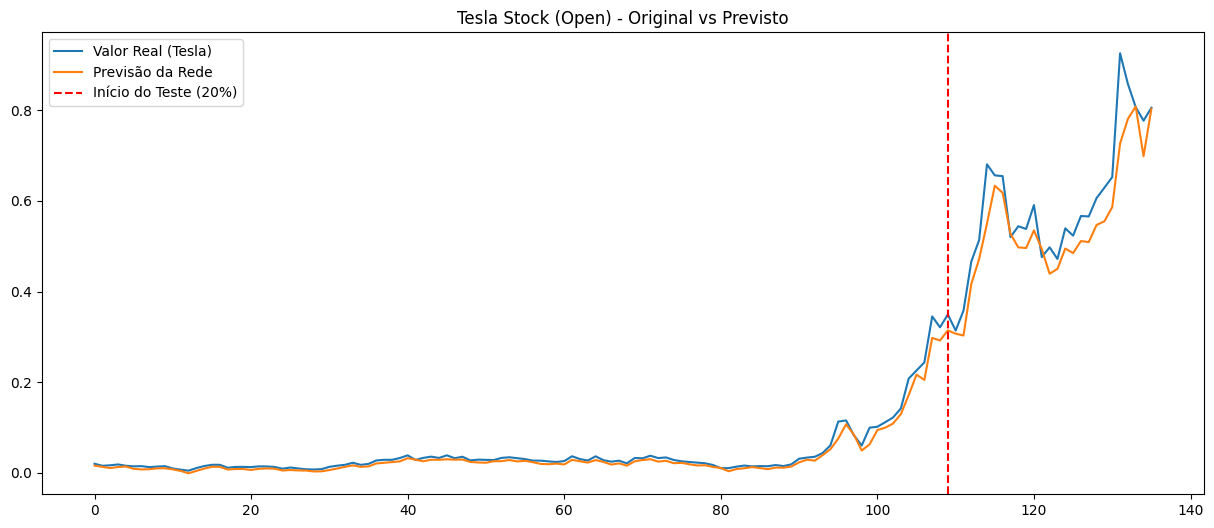

In [7]:
# 1. Definindo a arquitetura do Modelo 2
model2 = Sequential()

# Primeira camada LSTM: 50 unidades e 'return_sequences=True' (essencial para conectar à próxima)
model2.add(LSTM(50, input_shape=(time_steps, 1), return_sequences=True, activation='tanh'))

# Segunda camada LSTM: 50 unidades e 'return_sequences=False' (padrão para a última camada antes da Dense)
model2.add(LSTM(50, activation='tanh', return_sequences=False))

# Camada de saída
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam')

# 2. Treinando o modelo
print("Iniciando o treinamento do Modelo 2...")
model2.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# 3. Gerando as previsões
train_predict2 = model2.predict(trainX)
test_predict2 = model2.predict(testX)

# 4. Exibindo os Resultados
print("\n--- RESULTADOS DO MODELO 2 ---")
print_error(trainY, testY, train_predict2, test_predict2)
plot_result(trainY, testY, train_predict2, test_predict2)

Iniciando o treinamento do Modelo 3...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 - 4s - 34ms/step - loss: 0.0015
Epoch 2/20
109/109 - 1s - 7ms/step - loss: 4.4818e-04
Epoch 3/20
109/109 - 1s - 7ms/step - loss: 1.4324e-04
Epoch 4/20
109/109 - 1s - 7ms/step - loss: 7.6851e-04
Epoch 5/20
109/109 - 1s - 11ms/step - loss: 4.7003e-04
Epoch 6/20
109/109 - 1s - 12ms/step - loss: 2.0696e-04
Epoch 7/20
109/109 - 1s - 7ms/step - loss: 5.0199e-04
Epoch 8/20
109/109 - 1s - 11ms/step - loss: 2.1722e-04
Epoch 9/20
109/109 - 1s - 7ms/step - loss: 4.4521e-04
Epoch 10/20
109/109 - 1s - 7ms/step - loss: 1.1115e-04
Epoch 11/20
109/109 - 1s - 6ms/step - loss: 1.7369e-04
Epoch 12/20
109/109 - 1s - 7ms/step - loss: 9.5701e-05
Epoch 13/20
109/109 - 1s - 7ms/step - loss: 2.0006e-04
Epoch 14/20
109/109 - 1s - 7ms/step - loss: 4.7131e-04
Epoch 15/20
109/109 - 1s - 7ms/step - loss: 3.0023e-04
Epoch 16/20
109/109 - 1s - 7ms/step - loss: 1.4119e-04
Epoch 17/20
109/109 - 1s - 6ms/step - loss: 2.2945e-04
Epoch 18/20
109/109 - 1s - 6ms/step - loss: 2.0368e-04
Epoch 19/20
109/109 - 1s - 7ms

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

--- RESULTADOS DO MODELO 3 ---
RMSE Treino: 0.008
RMSE Teste: 0.060


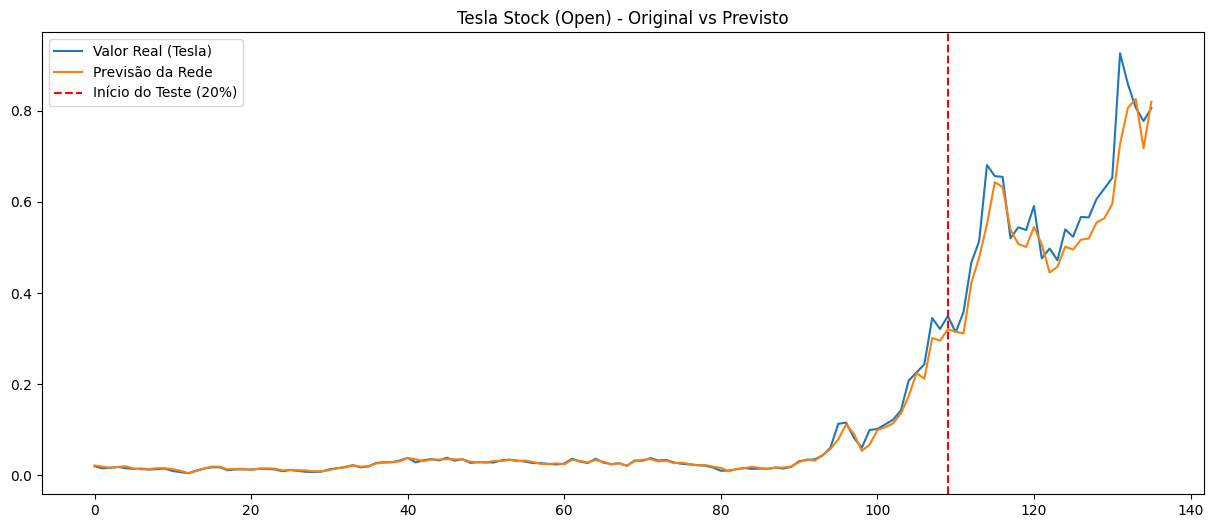

In [8]:
# 1. Definindo a arquitetura do Modelo 3
model3 = Sequential()

# Primeira camada LSTM + Dropout
model3.add(LSTM(50, input_shape=(time_steps, 1), return_sequences=True, activation='tanh'))
model3.add(Dropout(0.2)) # Desliga 20% dos neurônios nesta camada durante o treino

# Segunda camada LSTM + Dropout
model3.add(LSTM(50, activation='tanh', return_sequences=False))
model3.add(Dropout(0.2)) # Desliga 20% dos neurônios nesta camada

# Camada de saída
model3.add(Dense(1))

model3.compile(loss='mean_squared_error', optimizer='adam')

# 2. Treinando o modelo
print("Iniciando o treinamento do Modelo 3...")
model3.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# 3. Gerando as previsões
train_predict3 = model3.predict(trainX)
test_predict3 = model3.predict(testX)

# 4. Exibindo os Resultados
print("\n--- RESULTADOS DO MODELO 3 ---")
print_error(trainY, testY, train_predict3, test_predict3)
plot_result(trainY, testY, train_predict3, test_predict3)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iniciando o treinamento final (Modelo 4)...
Epoch 1/20
109/109 - 7s - 63ms/step - loss: 0.0029
Epoch 2/20
109/109 - 1s - 12ms/step - loss: 0.0016
Epoch 3/20
109/109 - 1s - 11ms/step - loss: 3.3245e-04
Epoch 4/20
109/109 - 1s - 11ms/step - loss: 9.8581e-04
Epoch 5/20
109/109 - 2s - 17ms/step - loss: 0.0012
Epoch 6/20
109/109 - 2s - 17ms/step - loss: 2.7920e-04
Epoch 7/20
109/109 - 2s - 20ms/step - loss: 4.4992e-04
Epoch 8/20
109/109 - 1s - 12ms/step - loss: 6.7549e-04
Epoch 9/20
109/109 - 1s - 12ms/step - loss: 1.8091e-04
Epoch 10/20
109/109 - 1s - 12ms/step - loss: 7.8425e-04
Epoch 11/20
109/109 - 2s - 22ms/step - loss: 5.5582e-04
Epoch 12/20
109/109 - 1s - 13ms/step - loss: 6.2446e-04
Epoch 13/20
109/109 - 2s - 20ms/step - loss: 6.4489e-04
Epoch 14/20
109/109 - 1s - 12ms/step - loss: 5.9965e-04
Epoch 15/20
109/109 - 1s - 12ms/step - loss: 5.6225e-04
Epoch 16/20
109/109 - 1s - 12ms/step - loss: 0.0012
Epoch 17/20
109/109 - 1s - 12ms/step - loss: 9.0945e-04
Epoch 18/20
109/109 - 1s - 13

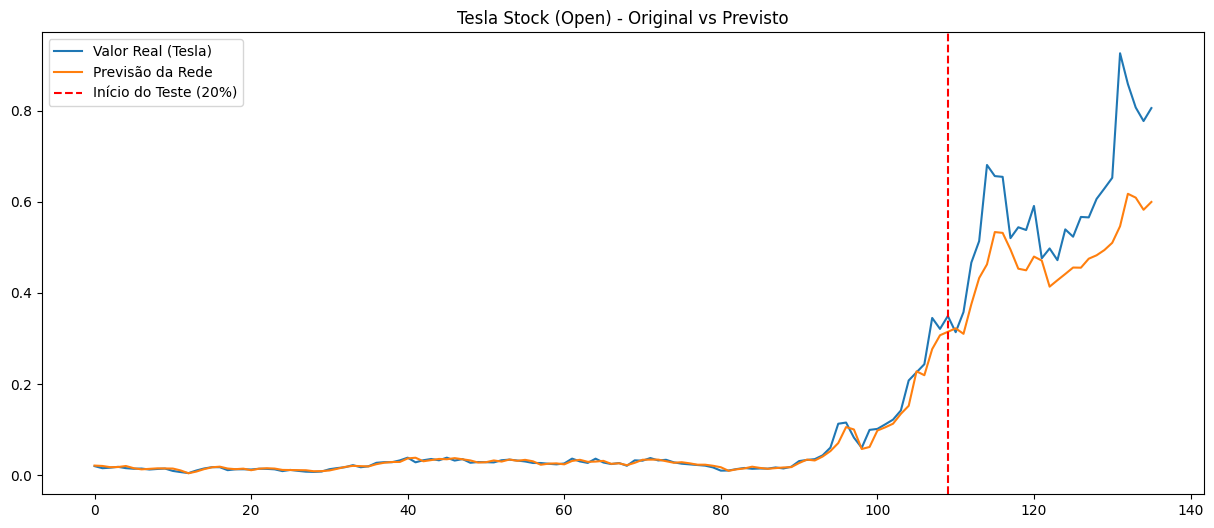

In [9]:
# 1. Definindo a arquitetura do Modelo 4
model4 = Sequential()

# Bloco 1
model4.add(LSTM(50, input_shape=(time_steps, 1), return_sequences=True, activation='tanh'))
model4.add(Dropout(0.2))

# Bloco 2
model4.add(LSTM(50, return_sequences=True, activation='tanh'))
model4.add(Dropout(0.2))

# Bloco 3
model4.add(LSTM(50, return_sequences=True, activation='tanh'))
model4.add(Dropout(0.2))

# Bloco 4 (Última LSTM, return_sequences=False)
model4.add(LSTM(50, activation='tanh', return_sequences=False))
model4.add(Dropout(0.2))

# Camada de saída
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam')

# 2. Treinando o modelo
print("Iniciando o treinamento final (Modelo 4)...")
model4.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# 3. Gerando as previsões
train_predict4 = model4.predict(trainX)
test_predict4 = model4.predict(testX)

# 4. Exibindo os Resultados
print("\n--- RESULTADOS DO MODELO 4 (FINAL) ---")
print_error(trainY, testY, train_predict4, test_predict4)
plot_result(trainY, testY, train_predict4, test_predict4)